### Pauta Notebook 1
### Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

[1] 25  5

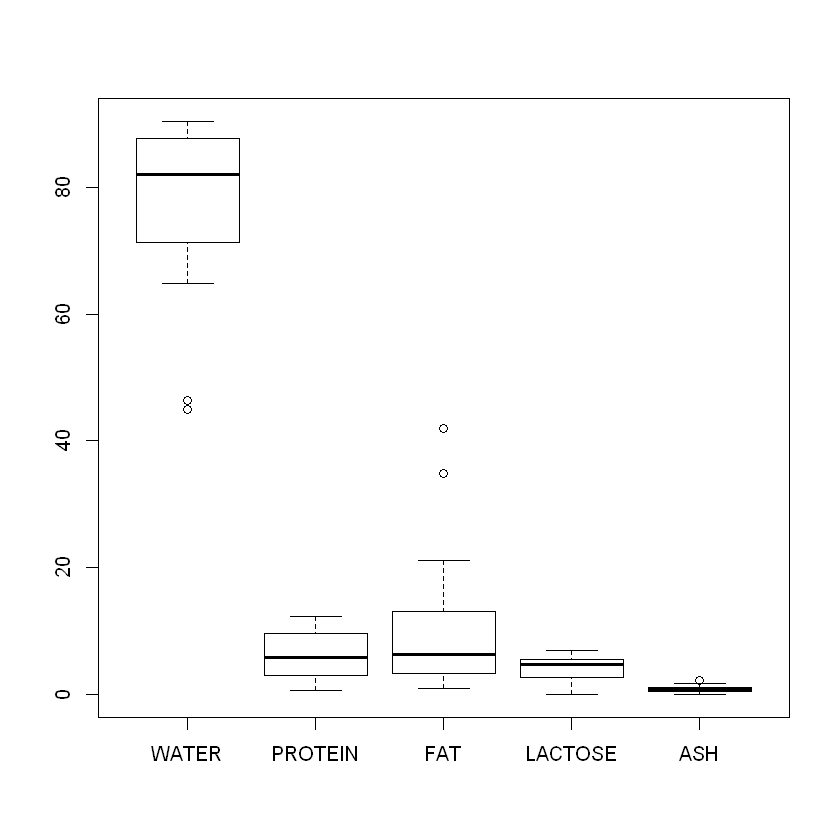

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)
dim(datos)

**Ejercicio 1:** describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

**Respuesta:** Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio,  el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

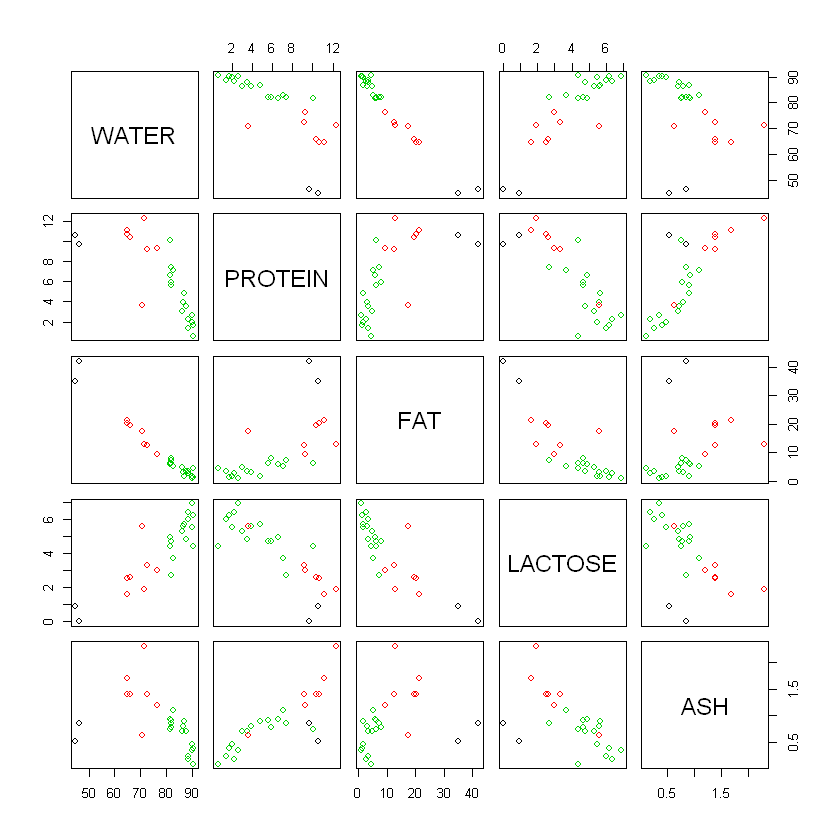

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

**Ejercicio 2:** Interprete y comente los resultados obtenidos. 

**Respuesta:** Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo negro (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo rojo, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo verde, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

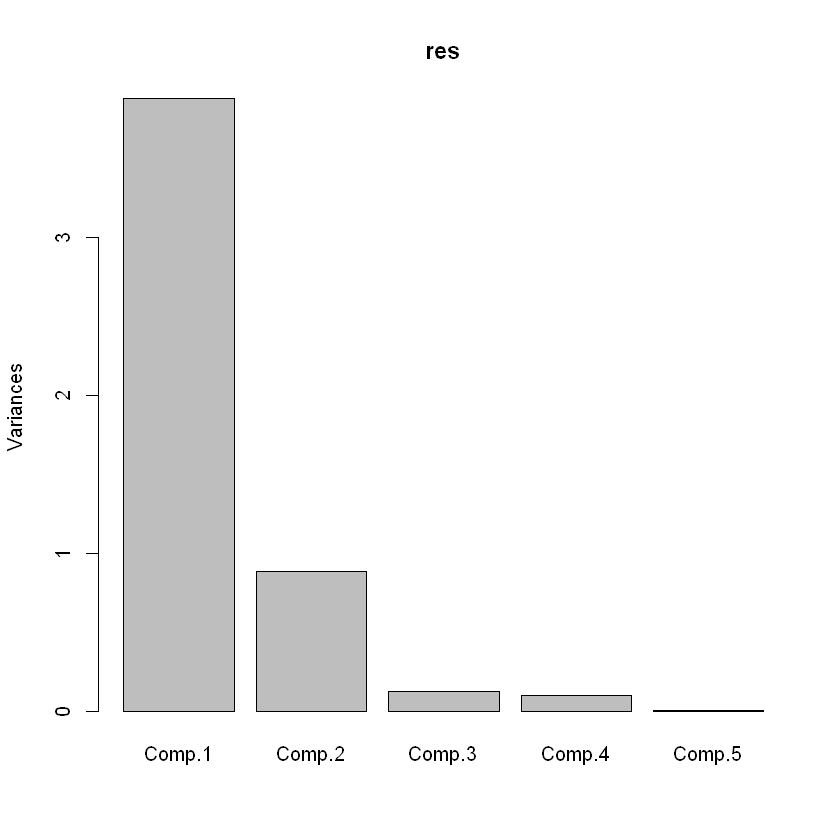

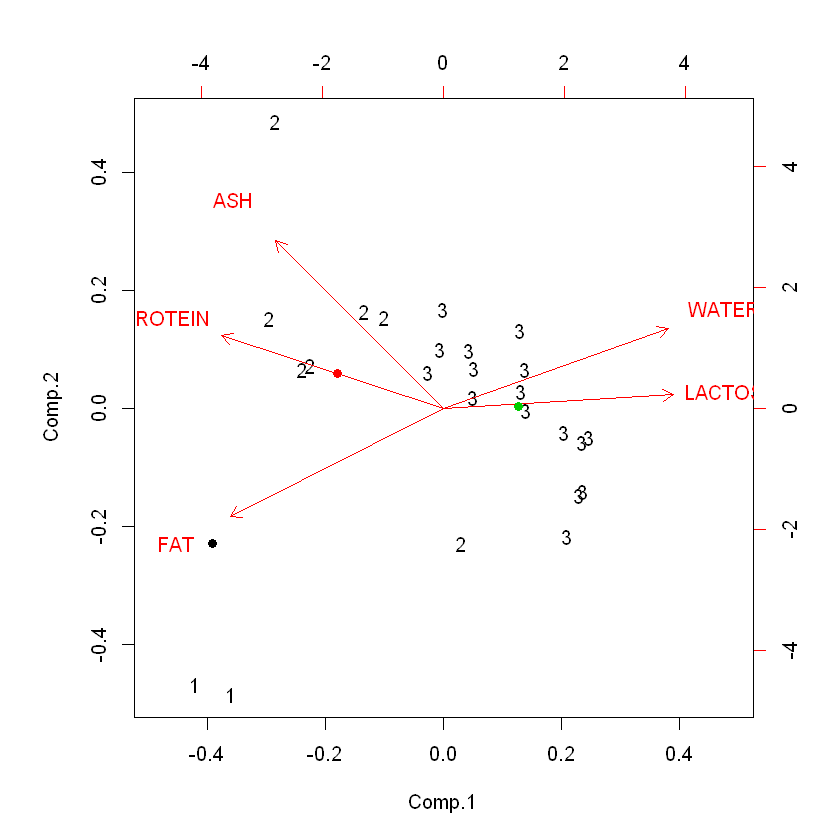

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


**Ejercicio 3:** Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

**Respuesta:** Al ejecutar Kmeans con 2 o 4 grupos se obtienen una agregación o separación de los grupos iniciales, siempre en función de los rangos de porcentajes de agua y grasa en la leche. Particularmente en el caso de 4 grupos, se divide el grupo mayor de 17 mamíferos en 2 grupos de 7 y 10 mamíferos. En el primero de ellos, el porcentaje de agua varía entre 76 y 83% y el porcentaje de grasa entre 5 y 10%. En el segundo, los porcentajes de agua son mayores al 83% y el porcentaje de grasa menor al 5%.

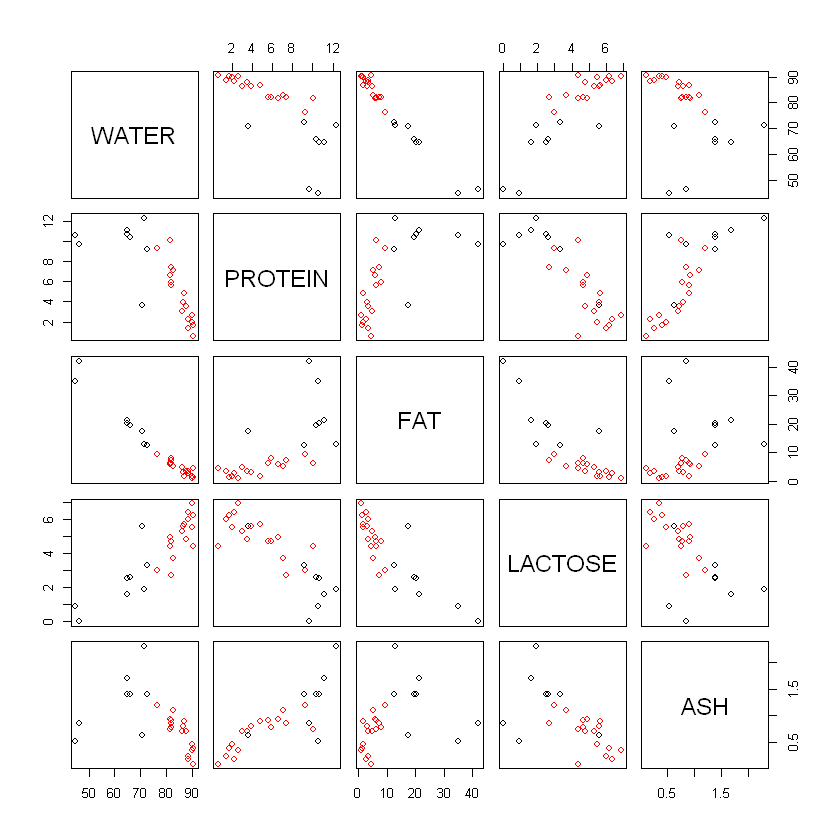

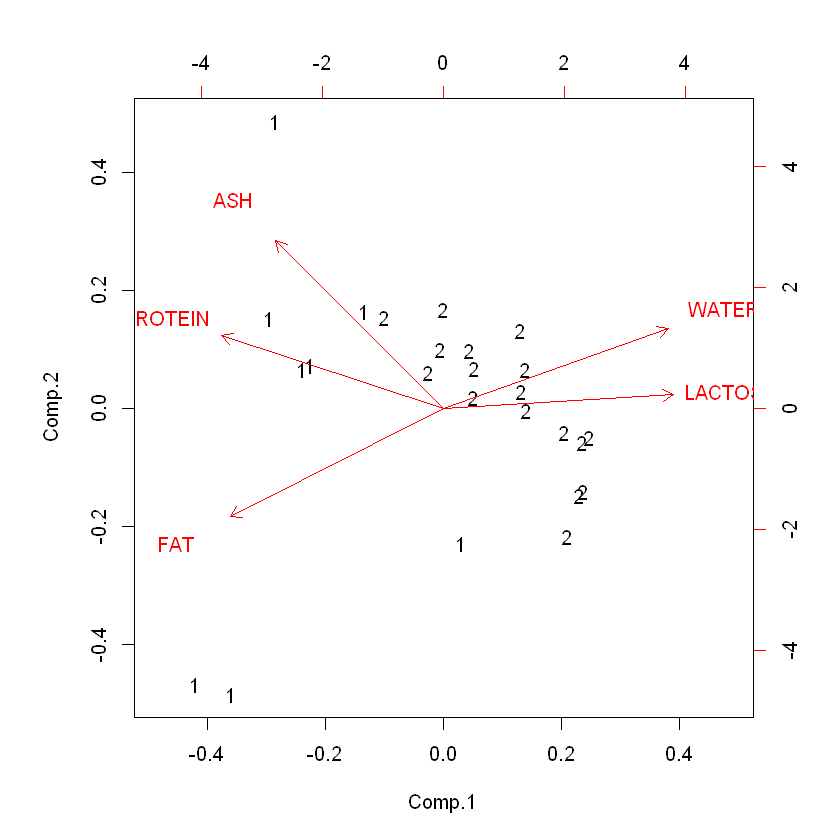

In [4]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
biplot(res,xlabs=cl$cluster)


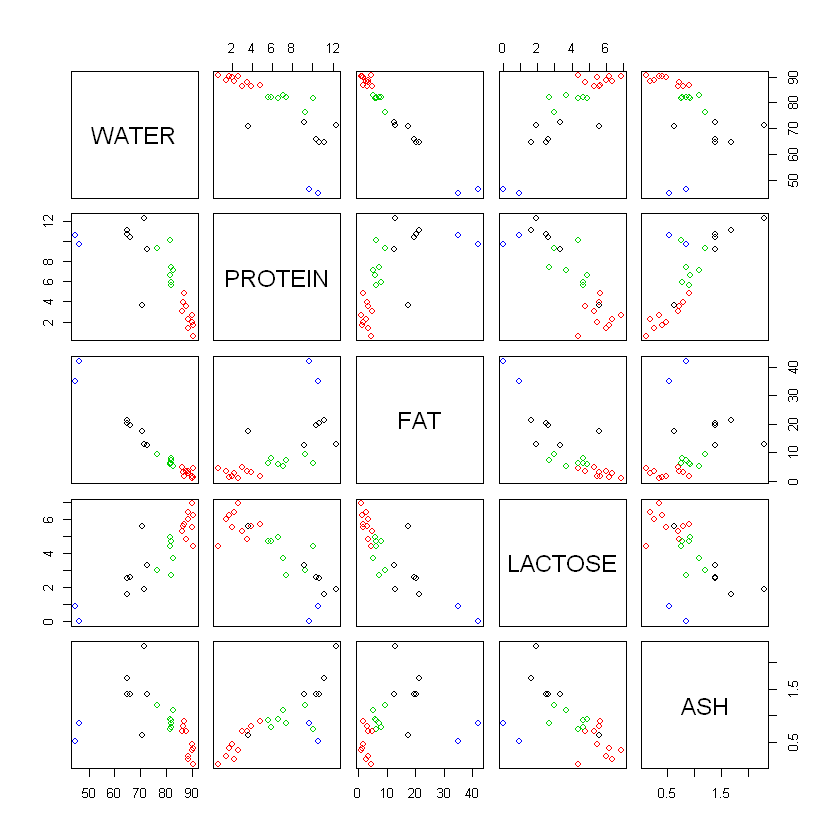

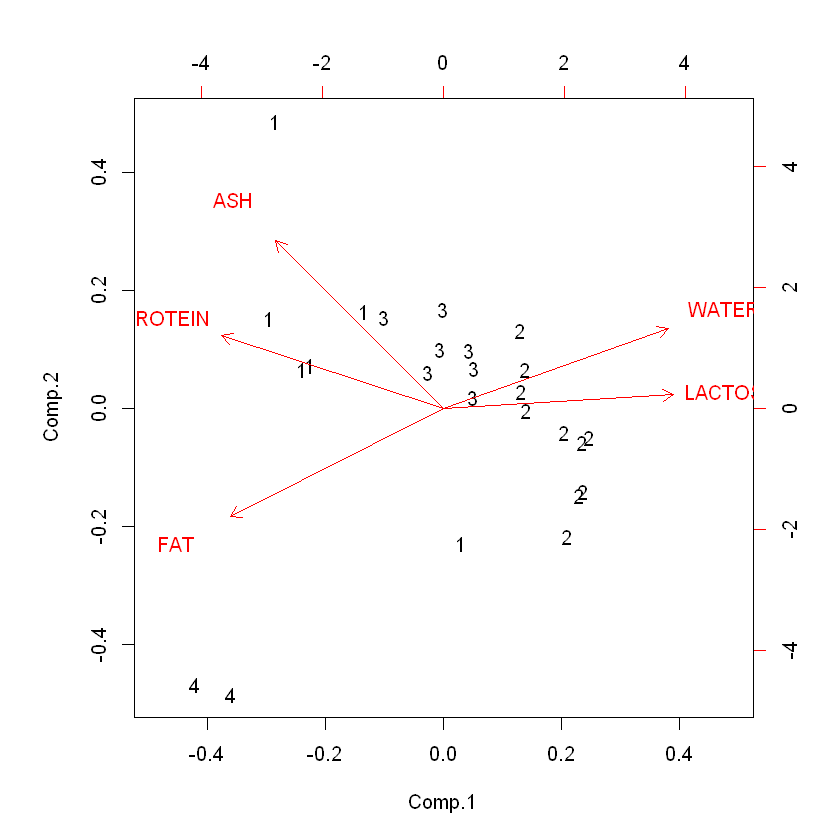

In [5]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)
biplot(res,xlabs=cl$cluster)

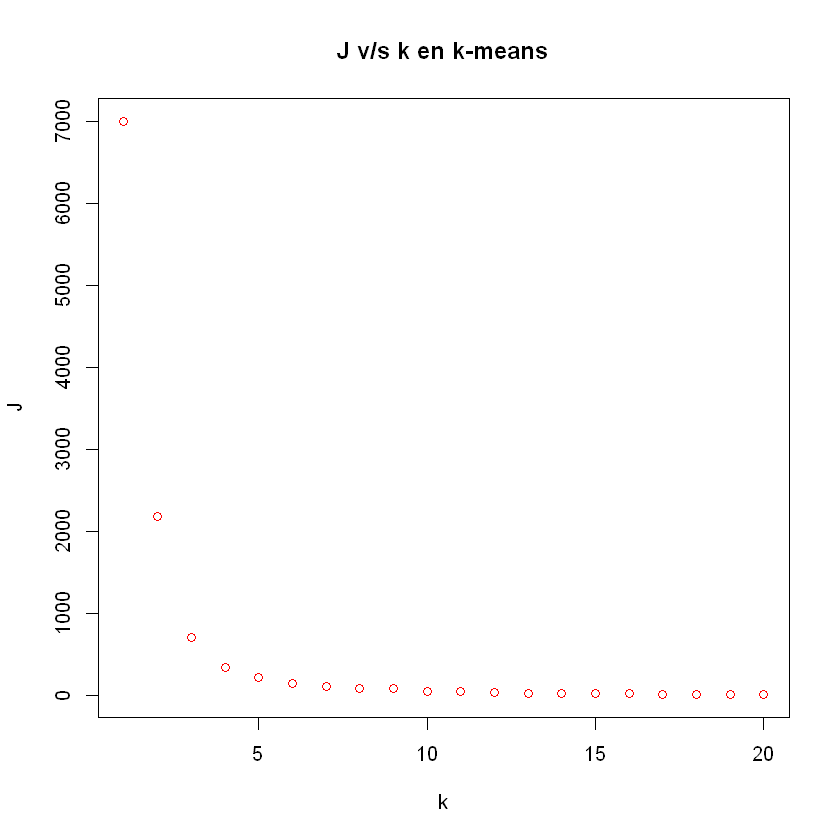

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 4:** de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.
**Respuesta:**: de acuerdo a la heurística vista en clases, el codo en el gráfico se encuentra entre k =3 o 4. Por parsimonia se escoje k=3.
El código para automatizar la heurística es el siguiente:

In [11]:
J<-rep(0,20)
fin_iter<-20
tasa <- rep(0,20)
dif <- rep(1,20)
cl_1 <- kmeans(datos,1,iter.max=1000,nstart=10)
J[1] <-cl_1$tot.withinss
cl_2 <- kmeans(datos,2,iter.max=1000,nstart=10)
J[2] <-cl_2$tot.withinss
dif[2] <- J[1]-J[2]
tasa[2]<-1
t_max <- 1
k_max <-1

for (k in 3:fin_iter){
     cl<-kmeans(datos,k,iter.max=2000,nstart=10)
	 J[k]<-cl$tot.withinss
     dif[k] <- J[k-1]-J[k]
    # calcula la tasa mientras la función de pérdida sea decreciente
     if ((dif[k] >0)&&(tasa[k-1]>0)){
         tasa[k] <- dif[k-1]/dif[k]
         if (tasa[k]>t_max) {
             t_max <- tasa[k]
             k_max <- k-1
         }
     }
     print(c(J[k],dif[k], dif[k-1], tasa[k]))
}

print(k_max)

[1]  704.403726 1482.419188 4818.266230    3.250272
[1]  341.885448  362.518278 1482.419188    4.089226
[1] 212.504458 129.380989 362.518278   2.801944
[1] 141.106117  71.398342 129.380989   1.812101
[1] 153.72255 -12.61643  71.39834   0.00000
[1]  87.33708  66.38547 -12.61643   0.00000
[1] 85.31208  2.02500 66.38547  0.00000
[1] 66.16780 19.14428  2.02500  0.00000
[1] 38.97660 27.19120 19.14428  0.00000
[1] 41.819658 -2.843063 27.191200  0.000000
[1] 25.156728 16.662930 -2.843063  0.000000
[1] 23.620075  1.536653 16.662930  0.000000
[1] 20.963500  2.656575  1.536653  0.000000
[1] 17.431917  3.531583  2.656575  0.000000
[1] 14.960667  2.471250  3.531583  0.000000
[1] 7.580333 7.380333 2.471250 0.000000
[1] 12.614117 -5.033783  7.380333  0.000000
[1]  5.269767  7.344350 -5.033783  0.000000
[1] 3


**Ejercicio 5:** Realice un análisis de clustering con el conjunto de datos iris.csv. Considere para ello las cuatro características numéricas que se proporcionan. Luego realice un análisis respecto a la etiqueta de cada observación. 
Interprete sus resultados. 

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

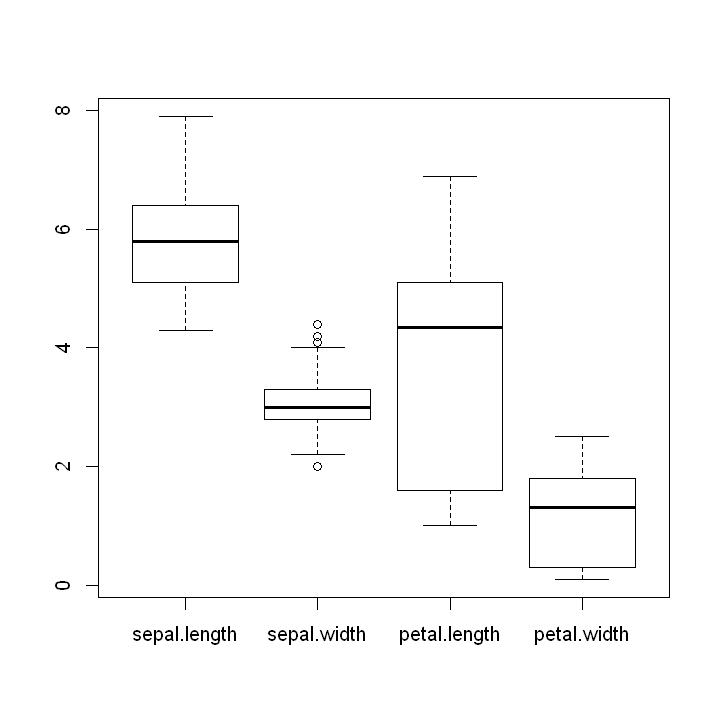

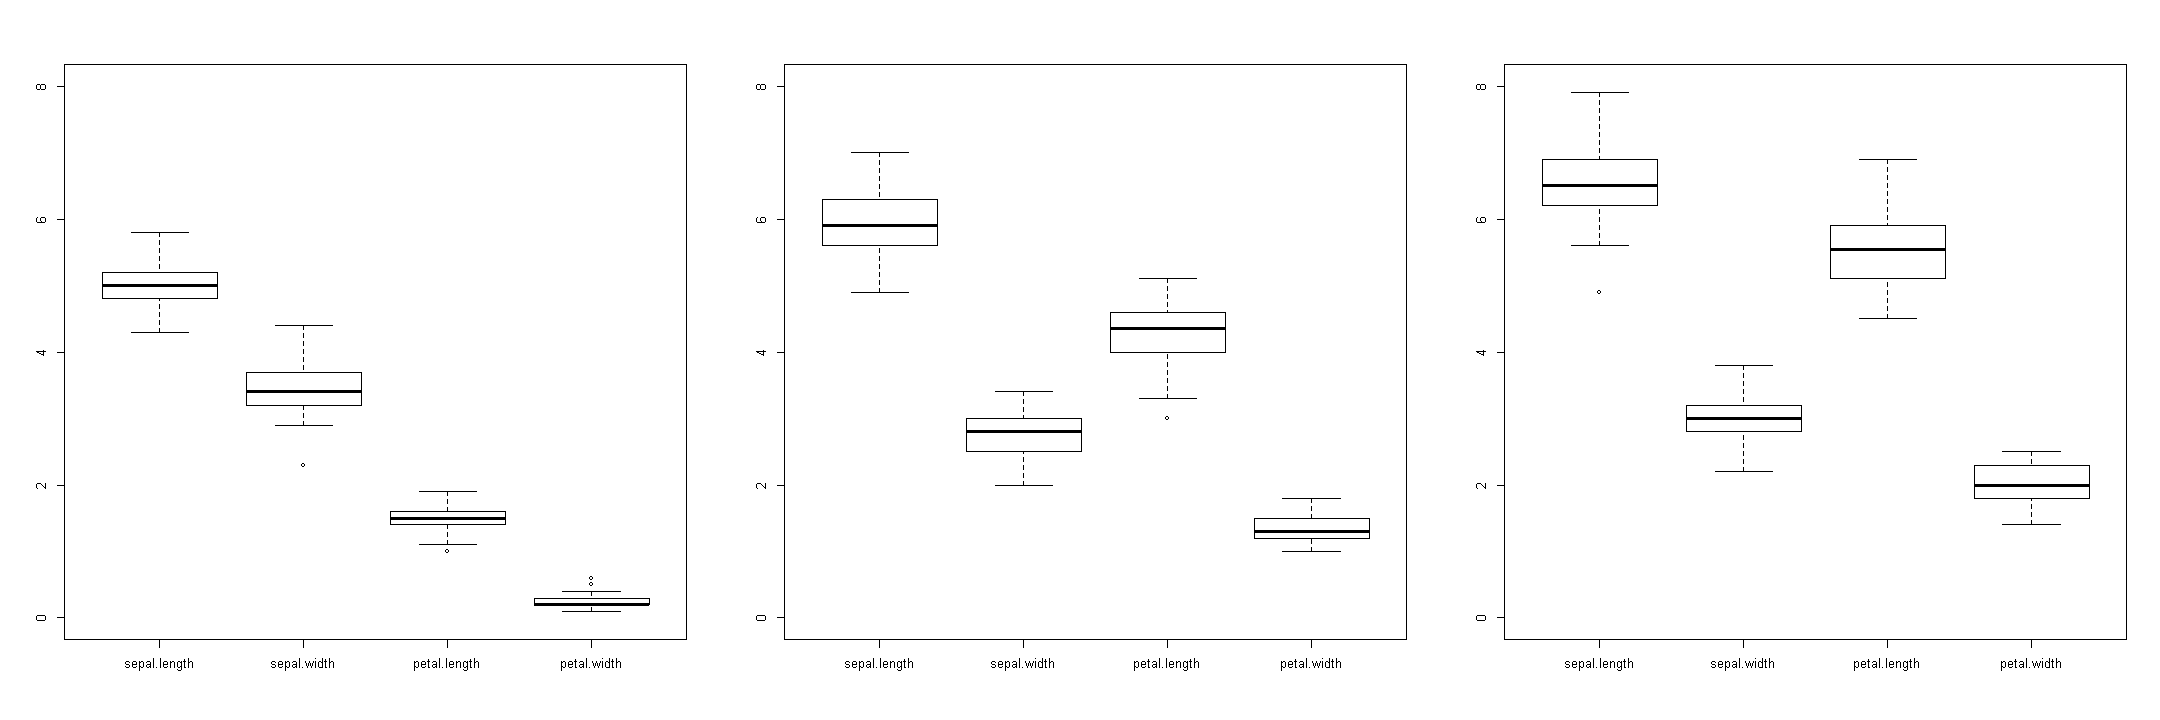

In [51]:
datos <-read.csv("iris.csv",sep=";",dec=",",header=TRUE)
summary(datos)
datos1 <- datos[,1:4]
options(repr.plot.width = 6, repr.plot.height = 6)
boxplot(datos1)
options(repr.plot.width = 18, repr.plot.height = 6)
par(mfrow=c(1,3))
boxplot(datos1[1:50,],ylim=c(0,8))
boxplot(datos1[51:100,],ylim=c(0,8))
boxplot(datos1[101:150,],ylim=c(0,8))


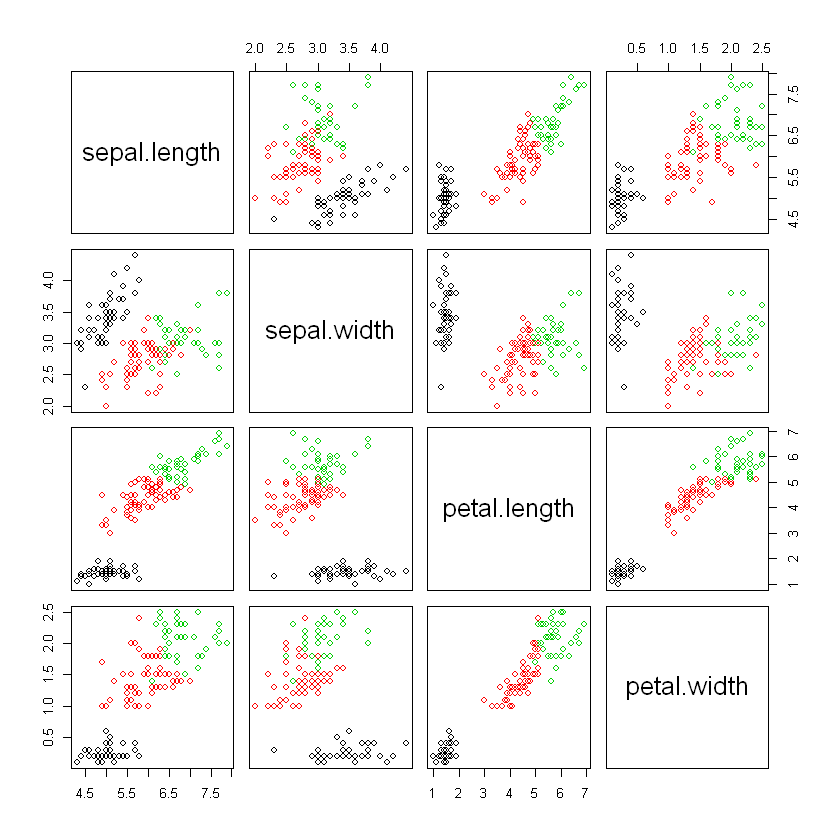

In [20]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos1,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos1,col=cl$cluster)

Call:
princomp(x = datos1, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.7083611 0.9560494 0.3830886 0.1439265 

 4  variables and  150 observations.


Comp.1,Comp.2,Comp.3,Comp.4
-2.224753,0.2889275,0.04283910,0.01834076
0.612400,-0.6004677,-0.02254389,-0.02156929
1.928128,0.5995427,-0.01958510,0.01105943


K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  sepal.length sepal.width petal.length petal.width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

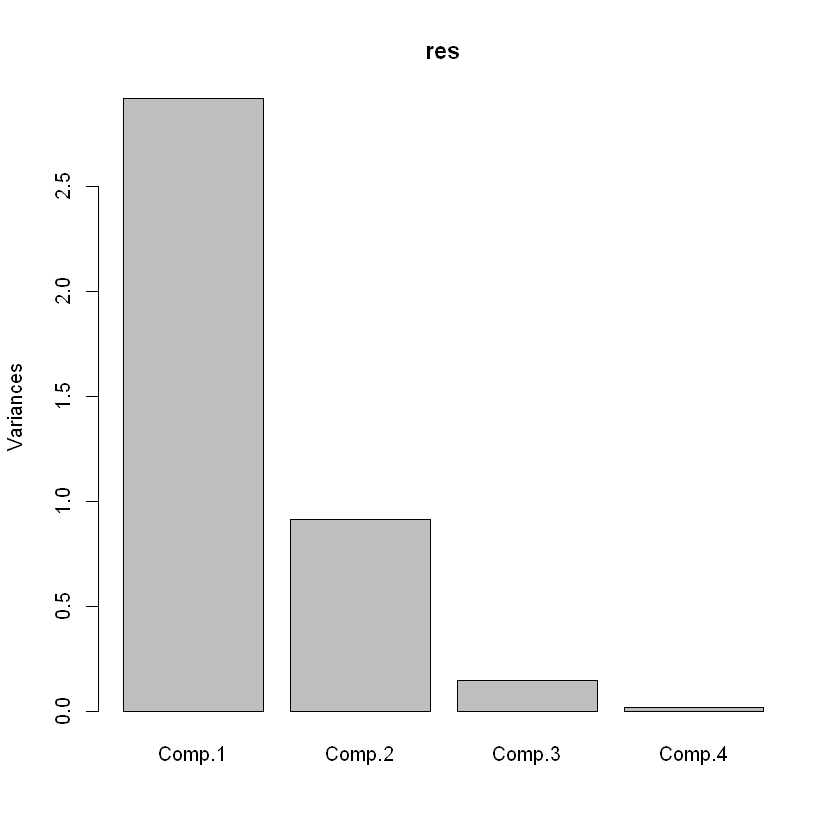

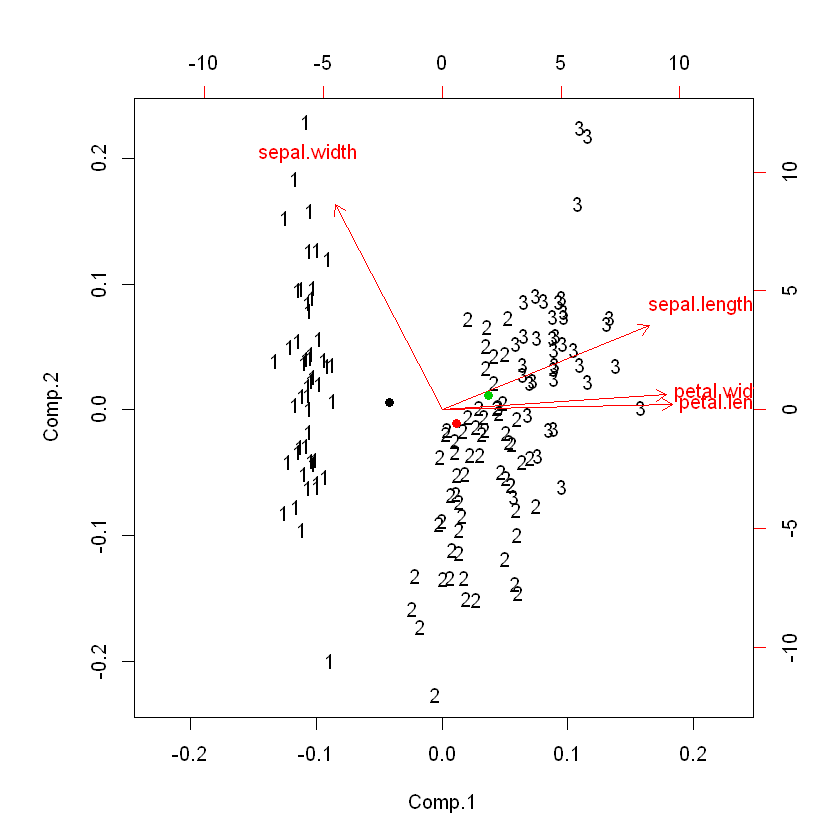

In [21]:
res <- princomp(datos1, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

In [42]:
print(cl)
cl2 <- cl$cl[51:100]
table(cl2)
table(cl3)



K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  sepal.length sepal.width petal.length petal.width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


cl2
 2  3 
48  2 

cl3
 2  3 
14 36 

**Respuestas Pregunta 5:**

(i) El análisis exploratorio de datos nos muestra que las 4 características tienen valores entre 0 y 8, con mayor varianza para el largo de los pétalos. Además, si graficamos considerando por separado los 3 tipos de plantas (las etiquetas) nos damos cuenta que la primera (setosa) tiene sepálos de anchos mayores y todas las demás características de tamaños menores que las otras dos especies. Las otras dos especies (versicolor y virginca) son bastante similares en todas las características, con medias levemente menores en el caso de versicolor.

(ii) En este caso, dadas las etiquetas, es natural considerar un agrupamiento en 3 grupos. El primer gráfico nos muestra que las variables que mejor discriman los tres grupos son el largo y ancho de los pétalos. Quedando en el primer grupo todas las observaciones con un largo de pétalos menor a 2 y un ancho de pétalos menor a 1. Los grupos 2 y 3 no se pueden discriminar por el rango de ninguna de las variables.

(iii) Al considerar un análisis en componentes principales, vemos que las 2 primeras componentes representan el 83,6% de la varianza de los datos, por lo que el primer plano principal es suficientemente representativo de los datos. Se observa en un sólo gráfico, lo siguiente: el grupo 1 es el que tiene los mayores valores de la variable ancho de sépalos y los menores valores de largo y ancho de pétalos. Las variables que mejor discriminan los 3 grupos son estas dos últimas.

(iv) Al hacer el análisis de como se comporta el algoritmo de agrupamiento en relación a las etiquetas de las observaciones, se obtiene que:
- el grupo 1 corresponde exactamente a la especie setosa
- el grupo 2 corresponde a la especie versicolor, pero hay dos observaciones que son asignadas el grupo 3 (4%)
- el grupo 3 corresponde a la especie virginica, pero hay 14 observaciones que son asignadas al grupo 2 (28%).

Kmeans no tiene capacidad para realizar una mejor agrupación, debido a que efectivamente las especies virginica y versicolor poseen individuos cuyas características de tamaño de sépalos y pétalos son muy similares entre si.

